### Day One

In [ ]:
# Input

with open("day_one_input.txt") as f:
    data = [int(i) for i in f.read().split("\n")]
print(data[:10])

In [ ]:
# Part One

len([True for i in range(len(data)-1) if data[i+1] > data[i]])

In [ ]:
# Part Two

len([True for i in range(len(data)) if sum(data[i+1:i+4]) > sum(data[i:i+3])])

### Day Two

In [ ]:
# Input

with open("day_two_input.txt") as f:
    data = f.read().split("\n")
print(data[:10])

In [ ]:
# Parse data

instructions = [(line.split()[0], int(line.split()[1])) for line in data]

In [ ]:
# Part One

horizontal = sum(dist for instr, dist in instructions if instr == "forward")
depth = sum(-dist if instr == "up" else dist if instr == "down" else 0 for instr, dist in instructions)
horizontal*depth

In [ ]:
# Part Two

aim, horizontal, depth = 0, 0, 0
for instr, dist in instructions:
    aim += -dist if instr == "up" else dist if instr == "down" else 0
    if instr == "forward":
        horizontal += dist
        depth += dist*aim
horizontal*depth

### Day Three

In [8]:
# Input

with open("day_three_input.txt") as f:
    data = f.read().split("\n")
print(data[:10])

['111111010011', '110011001100', '010011111000', '101001100011', '011011100110', '110100011011', '001000001010', '011011101000', '110011001000', '001011101010']


In [9]:
# Part One

from collections import Counter

gamma, epsilon = [], []
for bit in range(len(data[0])):
    counts = Counter([diagnostic[bit] for diagnostic in data]).most_common()
    gamma.append(counts[0][0])
    epsilon.append(counts[-1][0])
int("".join(gamma), 2)*int("".join(epsilon), 2)

3985686

In [10]:
# Part Two

ratings = []
for counter_index, bit_value in zip((0, -1), ("1", "0")):
    data_subset = data
    bit_index = 0
    while len(data_subset) > 1:
        counts = Counter([diagnostic[bit_index] for diagnostic in data_subset]).most_common()
        bit_test = bit_value if counts[0][1] == counts[1][1] else counts[counter_index][0]
        data_subset = [diagnostic for diagnostic in data_subset if diagnostic[bit_index] == bit_test]
        bit_index += 1
    ratings.append(int("".join(data_subset[0]), 2))
ratings[0]*ratings[1]

2555739

### Day Four

In [11]:
# Input

import numpy as np

with open("day_four_input.txt") as f:
    numbers = f.readline().strip()

numbers = [int(n) for n in numbers.split(",")]
boards = np.recfromtxt("day_four_input.txt", skip_header=1).reshape(100, 5, 5) # Thanks Josh

print(numbers[:10])
print(boards[0])

[49, 48, 98, 84, 71, 59, 37, 36, 6, 21]
[[86 46 47 61 57]
 [44 74 17  5 87]
 [78  8 54 55 97]
 [11 90  7 75 70]
 [81 50 84 10 60]]


In [12]:
# Part One

results = []
for i, board in enumerate(boards):
    mask = np.full(board.shape, False)
    numbers_iter = iter(numbers)
    while 5 not in np.sum(mask, axis=0) and 5 not in np.sum(mask, axis=1):
        last_called = next(numbers_iter)
        mask = mask | (board == last_called)
    results.append({
        "score": int(last_called*board[~mask].sum()),
        "order": numbers.index(last_called)
    })

sorted(results, key=lambda k: k["order"])[0]["score"]

65325

In [13]:
# Part Two

sorted(results, key=lambda k: k["order"], reverse=True)[0]["score"]

4624

### Day Five

In [14]:
# Input

with open("day_five_input.txt") as f:
    data = f.read().split("\n")
data[:10]

['599,531 -> 599,32',
 '435,904 -> 435,489',
 '768,714 -> 768,187',
 '845,552 -> 596,801',
 '167,680 -> 167,445',
 '45,887 -> 45,346',
 '780,295 -> 179,896',
 '310,539 -> 602,831',
 '535,556 -> 349,556',
 '797,180 -> 797,62']

In [15]:
# Part One

from shapely import wkt
from rasterio.features import rasterize
from rasterio.enums import MergeAlg

vents = [wkt.loads(
    f"LINESTRING ({line.replace(',', ' ').replace(' -> ', ', ')})"
) for line in data]
orthogonal_vents = [vent for vent in vents if len(set(vent.bounds)) < 4]
np.sum(rasterize(orthogonal_vents, out_shape=(1000,1000), merge_alg=MergeAlg("ADD")) >=2)

7644

In [16]:
# Part Two

np.sum(rasterize(vents, out_shape=(1000,1000), merge_alg=MergeAlg("ADD")) >=2)

18627

### Day Six

In [17]:
# Input

with open("day_six_input.txt") as f:
    data = f.read().split(",")
data[:10]

['3', '5', '4', '1', '2', '1', '5', '5', '1', '1']

In [18]:
%%time

# Part One

timers = [int(d) for d in data]

for day in range(80):
    new_timers = []
    for i, timer in enumerate(timers):
        timers[i] = timer-1 if timer-1 >= 0 else 6
        new_timers.append(8) if timer-1 == -1 else None
    timers.extend(new_timers)
    
len(timers)

CPU times: user 1.64 s, sys: 7.97 ms, total: 1.65 s
Wall time: 1.66 s


374927

In [19]:
%%time

# Part Two -- refactor of Part One

from collections import deque

timers = deque([0]*9)
for d in [int(d) for d in data]:
    timers[d] += 1
    
for day in range(256):
    timers.rotate(-1)
    timers[6] += timers[8]

sum(timers)

CPU times: user 974 µs, sys: 4 µs, total: 978 µs
Wall time: 986 µs


1687617803407

### Day Seven

In [20]:
# Input

with open("day_seven_input.txt") as f:
    data = f.read().split(",")
data[:10]

['1101', '1', '29', '67', '1102', '0', '1', '65', '1008', '65']

In [21]:
# Part One

from statistics import median

positions = [int(d) for d in data]
optimum = int(median(positions))
sum([abs(i-optimum) for i in positions])

341558

In [22]:
%%time

# Part Two

positions = np.array(positions)
optimums = []
mid = int(np.mean(positions))

for opt in range(max(positions)): # mid-3, mid+3
    distances = np.abs(positions-opt)
    fuels = distances * (distances+1) // 2 # Thanks Harry
    optimums.append({"opt": opt, "fuel": np.sum(fuels)})
    
"""
for opt in range(min(positions), max(positions)):
    fuel = 0
    for p in positions:
        if abs(p-opt) > 0:
            fuel += max(np.cumsum(np.arange(abs(p-opt)+1)))
    optimums.append({"position":opt, "fuel": fuel})
"""

sorted(optimums, key=lambda opt: opt["fuel"])[0]["fuel"]

CPU times: user 84.5 ms, sys: 2.91 ms, total: 87.5 ms
Wall time: 122 ms


93214037

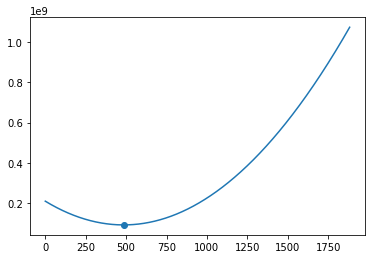

In [23]:
import matplotlib.pyplot as plt

plt.plot(
    [opt["opt"] for opt in optimums],
    [opt["fuel"] for opt in optimums]
)

plt.scatter(
    sorted(optimums, key=lambda opt: opt["fuel"])[0]["opt"],
    sorted(optimums, key=lambda opt: opt["fuel"])[0]["fuel"]
)

### Day Eight

In [24]:
# Input

with open("day_eight_input.txt") as f:
    data = f.read().split("\n")
data[:10]

['bge dacgef gefac geabf gcab baedf efbdgc agcfeb gb edacfgb | dabef caefg gb gfabe',
 'cefgda agcbf febcda dc bfeda bdec cabfd dbafge febgacd dca | gafedc dfcab cd abgcf',
 'fabe gfdcea cbdga fgbdec dacfbeg geabc gaecf be agfbce beg | ebacfg fegdca agceb bafe',
 'gb fegac dgbafc dgba gdbfeac fcbade edcbgf fgacb bgf abfcd | cfedbag gbf fgcea agdb',
 'fedgc adecbgf fec fcabde fc fgbc edcfbg aegdf egcdb gebdac | gecdf fc defcg cgdeab',
 'edgfac fcgbea fdbca dcgeabf gceba ed edcgab debg edabc ade | dbcaf cgfdbae dbeg egbdcaf',
 'cbagef fdcga dgaefb de acfeb ceafd ecbd dfabec bcfdega ade | ed dbefac cafbed ed',
 'dfecgb afcde fg cbdgfa edbgac cdfag dbfgeca gcf gbfa gdcba | fg bedfgc bdcafg gbfdeac',
 'ecagbf eba eb gbefa gfabcd efcb ebagcd gcfabed abcfg gefad | dfcbga efbagc eagcdbf be',
 'fce bcagf bcdgaef agbfdc efbda cebdfg geca gbecaf bceaf ec | gcea abcef cefab cbgaf']

In [25]:
# Part One

signals, outputs = zip(*[d.split(" | ") for d in data])
signals = [signal.split() for signal in signals]
outputs = [output.split() for output in outputs]

len([digit for output in outputs for digit in output if len(digit) in [2, 4, 3, 7]])

355

In [26]:
# Part Two

totals = []

for signal, output in zip(signals, outputs):
    
    codes = {}
    
    for digit in signal:
        if len(digit) in [2, 4, 3, 7]: # It's 1, 4, 7 or 8
            length_to_digit = {2: 1, 4: 4, 3: 7, 7: 8}
            codes[frozenset(digit)] = length_to_digit[len(digit)]

    one = [code for code, digit in codes.items() if digit == 1][0]
    four = [code for code, digit in codes.items() if digit == 4][0]
    
    for digit in signal:
        if len(digit) == 5: # It's 2, 3 or 5 -- tell them apart by their ∩ with 1 and 4
            if len(one & set(digit)) == 2:
                codes[frozenset(digit)] = 3
            elif len(four & set(digit)) == 2:
                codes[frozenset(digit)] = 2
            else:
                codes[frozenset(digit)] = 5
        elif len(digit) == 6: # It's 0, 6 or 9 -- tell them apart by their ∩ with 1 and 4
            if len(one & set(digit)) == 1:
                codes[frozenset(digit)] = 6
            elif len(four & set(digit)) == 3:
                codes[frozenset(digit)] = 0
            else:
                codes[frozenset(digit)] = 9

    digits = [str(codes[frozenset(display)]) for display in output]
    totals.append(int("".join(digits)))

sum(totals)

983030

### Day Nine

In [27]:
# Input

with open("day_nine_input.txt") as f:
    data = np.genfromtxt(f, delimiter=1, dtype=np.int16)
data.shape

(100, 100)

In [28]:
# Part One -- switched from minimum_filter to labels

from scipy.ndimage import label

labels, num_features = label(data!=9)

basins = []

for l in range(num_features+1):
    if min(data[labels==l]) != 9:
        basins.append({"size": len(data[labels==l]), "score": min(data[labels==l])+1})

"""
from scipy.ndimage import minimum_filter

mins = minimum_filter(data, footprint=np.array([[0,1,0],[1,1,1],[0,1,0]]))

lows = data[data==mins]
np.sum(lows[lows!=9]+1)
"""

sum([basin["score"] for basin in basins])

462

In [29]:
# Part Two -- switched from rasterio to labels

"""
from rasterio.features import shapes
from shapely.geometry import shape

basins = []
for polygon, _ in shapes(np.ones(data.shape, dtype=np.int16), mask=(data!=9)):
    basins.append(shape(polygon))

# Could presumably use rasterio's shapes to get low points in part one too
    
int(np.product([p.area for p in sorted(basins, reverse=True, key=lambda p: p.area)[:3]]))
"""

np.product(sorted([basin["size"] for basin in basins], reverse=True)[:3])

1397760

In [30]:
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,10))

for basin in basins:
    ax.plot(*basin.exterior.xy, c="grey")
for basin in sorted(basins, reverse=True, key=lambda p: p.area)[:3]:
    ax.plot(*basin.exterior.xy)
ax.imshow(data==9)
"""

'\nimport matplotlib.pyplot as plt\n\nfig, ax = plt.subplots(1,1, figsize=(10,10))\n\nfor basin in basins:\n    ax.plot(*basin.exterior.xy, c="grey")\nfor basin in sorted(basins, reverse=True, key=lambda p: p.area)[:3]:\n    ax.plot(*basin.exterior.xy)\nax.imshow(data==9)\n'

### Day Ten

In [31]:
# Input

with open("day_ten_input.txt") as f:
    data = f.read().split("\n")
data[:10]

['([({<(({<[(<([{}<>])<(()<>){<>[]}>>[[{<>{}}[<>{}]][(<>[])<{}<>>]]){[{{[][]}[[]{}]}({{}[]}[{}<>])]({({}{})',
 '([{{[(<{[{{<[{{}[]}{(){}}]{[{}{})([]())}>}(({{{}}{<>{}}}{(()[])(()<>)}){<<{}()><[][]>>})}(<<<(<',
 '((<[[<([[({{[([]{})([][])]{({}())(()}}}({[[][]](()<>)}(<[]{}>[[]{}]))}<[[{()<>}<[][]>]]{{{',
 '{{[{{<[{[[(<((<>())(<><>))<<()[]>>>)<<<(<><>)[()()]><([])<[]>>>{{({}()){[][]}}<[[]]>}>]]<[',
 '[<{(<{<<[[[[(<{}()>{{}()})[[()()]<{}()>]]{{<<><>>({}<>)}(([]{})[{}<>]}}]{{({[]<>}{[][]})<[<>[]]<{}()>>}[{',
 '<<{<{<<{<<[(([<>()][<>{}])[<()<>>{()[]}])[<({})<<>[]>><<[][]>[[]<>]>]]>>((<<<(<>[])[{}{}]>[<[]{}>({})]>>)<',
 '<[[[(<{[{((<{(()[])[{}<>]}([[][]][()<>])>[(<[]())<<><>>){({}{}){<>[]}}]))}]}>{<([<<[<(()<>)',
 '({{{<<<{({[{[<()[]>({}())]{<{}()>({}{})}}]{([(<>)<[]<>>]{([]<>)(()())})(<<<><>>{{}{}}>[({}{})<()',
 '{{<<[<[{<(({{({}<>)<<>()>}{{{}<>}}}{<({}())({}<>)>([<><>]{()[]})}))<[<{<[]{}>([][])}((<>())({}[]',
 '[[<([({<<<<{<{<><>}{()<>}>}>{(([[]{}>[{}()])[[[][]]])(<[[]<>](())>(<()[]>({}<>)

In [32]:
# Part One

points = {")": 3, "]": 57, "}": 1197, ">": 25137}
open_brackets = ["<", "(", "[", "{"]
close_brackets =  [">", ")", "]", "}"]
errors = {k:0 for k in close_brackets}
incomplete = []

for i, line in enumerate(data):
    brackets = []
    corrupt = False
    for char in line:
        if char in open_brackets:
            brackets.append(char)
        elif char in close_brackets:
            if close_brackets.index(char) == open_brackets.index(brackets[-1]):
                del(brackets[-1])
            else:
                errors[char] += 1
                corrupt = True
                break
    incomplete.append((line, brackets)) if not corrupt else None

sum([points[k]*v for k, v in errors.items()])

374061

In [33]:
# Part Two

from statistics import median

points = {")": 1, "]": 2, "}": 3, ">": 4}
scores = []

for line, brackets in incomplete:
    completion = [close_brackets[open_brackets.index(i)] for i in reversed(brackets)]
    score = 0
    for i in completion:
        score *= 5
        score += points[i]
    scores.append(score)

median(sorted(scores))

2116639949

### Day Eleven

In [65]:
# Input

data = np.genfromtxt("day_eleven_input.txt", delimiter=1, dtype=np.int16)
data

array([[4, 7, 3, 8, 6, 1, 5, 5, 5, 6],
       [6, 7, 4, 4, 4, 2, 3, 7, 4, 1],
       [2, 8, 1, 2, 8, 6, 8, 8, 2, 7],
       [8, 8, 4, 4, 3, 6, 5, 6, 2, 4],
       [4, 5, 4, 6, 6, 7, 4, 2, 6, 6],
       [4, 5, 1, 8, 6, 7, 4, 2, 7, 8],
       [7, 4, 5, 7, 2, 3, 7, 4, 3, 1],
       [4, 5, 2, 4, 8, 7, 3, 2, 4, 7],
       [3, 1, 5, 3, 3, 4, 1, 3, 1, 4],
       [3, 7, 2, 1, 4, 1, 4, 6, 6, 7]], dtype=int16)

In [64]:
# Part One

octopi = np.array(np.pad(data, 1, mode="constant", constant_values=0))
mask = np.ones(octopi.shape, dtype=bool)
mask[1:-1,1:-1] = False

record = []
flashes = 0

for step in range(1, 500):
    concurrent = False
    octopi += 1
    while np.any(np.logical_and(octopi>9, mask==False)):
        for row, col in zip(*np.where(np.logical_and(octopi>9, mask==False))):
            octopi[row-1:row+2, col-1:col+2] += 1
            mask[row, col] = True
            flashes += 1

    if np.all(mask[1:-1,1:-1]==True):
        concurrent = True
            
    octopi[mask] = 0
    mask.fill(True)
    mask[1:-1,1:-1] = False
    
    record.append({"step": step, "flashes": flashes, "concurrent": concurrent})

[r for r in record if r["step"] == 100][0]["flashes"]

1000

In [60]:
# Part Two

sorted([r for r in record if r["concurrent"] == True], key=lambda r: r["step"])[0]["step"]

249

### Day Twelve -- unfinished

In [37]:
# Input

caves = """start-A
start-b
A-c
A-b
b-d
A-end
b-end"""

caves = caves.split("\n")
caves

['start-A', 'start-b', 'A-c', 'A-b', 'b-d', 'A-end', 'b-end']

('start', 'A')
('A', 'c')
('A', 'b')
('b', 'start')
('b', 'd')
('b', 'end')
('end', 'A')


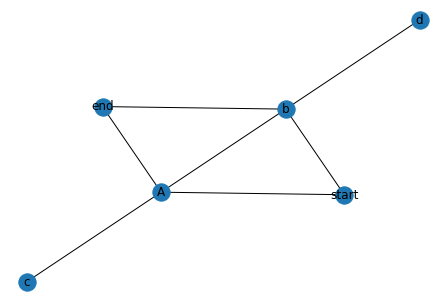

In [38]:
import networkx as nx

cave_graph = nx.Graph()
for cave in caves:
    cave_graph.add_edge(*cave.split("-"))

nx.draw(cave_graph, with_labels=True)

for e in nx.edge_dfs(cave_graph, source="start"):
    print(e)

### Day Thirteen

In [39]:
# Input

with open("day_thirteen_input.txt") as f:
    data = f.read()

dots = [d.split(",") for d in data.split("\n\n")[0].split("\n")]
dots = [(int(d[0]), int(d[1])) for d in dots]

instructions = [i.replace("fold along ", "") for i in data.split("\n\n")[1].split("\n")]

print(dots[:10])
print(instructions[:3])

[(1148, 688), (1020, 159), (857, 707), (1176, 415), (388, 275), (50, 849), (544, 520), (1, 418), (1119, 280), (217, 26)]
['x=655', 'y=447', 'x=327']


781


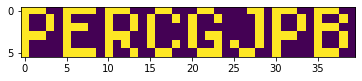

In [40]:
# Parts One & Two

width = max([d[0] for d in dots])+1
height = max([d[1] for d in dots])+1

paper = np.zeros((height, width), dtype=int)

for x, y in dots:
    paper[y, x] = 1

for i, instr in enumerate(instructions):
    if instr[0] == "y":
        loc = int(instr[2:])
        folded = paper[:loc, :]
        foldee = np.flipud(paper[loc+1:, :])
        if foldee.shape[0] < folded.shape[0]: # One fold needs padding
            margin = folded.shape[0] - foldee.shape[0]
            foldee = np.concatenate((np.zeros((margin, foldee.shape[1]), dtype=int), foldee))
        paper = folded | foldee
    elif instr[0] == "x":
        loc = int(instr[2:])
        folded = paper[:, :loc]
        foldee = np.fliplr(paper[:, loc+1:])
        paper = folded | foldee
    if i == 0:
        print(np.sum(paper)) # Part One

plt.imshow(paper) # Part Two